In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(path):
    # OpenCV loads images in BGR by default and it is converted to RGB format.
    bgr_pic = cv2.imread(path)
    if bgr_pic is None:
        raise FileNotFoundError(f"Image not found at {path}")
    rgb_pic = cv2.cvtColor(bgr_pic, cv2.COLOR_BGR2RGB)
    return rgb_pic


In [3]:
def to_grayscale(rgb_img):
    # The rgb pic is converted to grayscale
    return cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

In [4]:
def invert_image(gray_img):
    # The grayscale image is now inverted
    return 255 - gray_img

In [5]:
def blur_image(inverted_img, ksize=(21, 21)):
    # The inverted image is blurred to smooth out fine details
    return cv2.GaussianBlur(inverted_img, ksize, sigmaX=0, sigmaY=0)

In [6]:
def dodge_blend(gray_img, blur_inv_img):
    # The original gray scale image is blended with the inverted blurred image.
    # This will brighten the edges and gives scratchy pencil look.
    denominator = 255 - blur_inv_img
    denominator[denominator == 0] = 1
    sketch = cv2.divide(gray_img, denominator, scale=256.0)
    # Clip and convert back to 8-bit
    return np.clip(sketch, 0, 255).astype(np.uint8)

In [7]:
def pencil_sketch(path, blur_kernel=(21,21)):
    """
    This is an entire pipleline which will:
    1. Read the image
    2. Convert the RGB image to gray scale
    3. Invert the image
    4. Blur the image
    5. Perform the dodge blend
    """
    rgb_img = read_image(path)
    gray_img = to_grayscale(rgb_img)
    inv_img = invert_image(gray_img)
    blur_inv_img = blur_image(inv_img, ksize=blur_kernel)
    sketch = dodge_blend(gray_img, blur_inv_img)
    return sketch

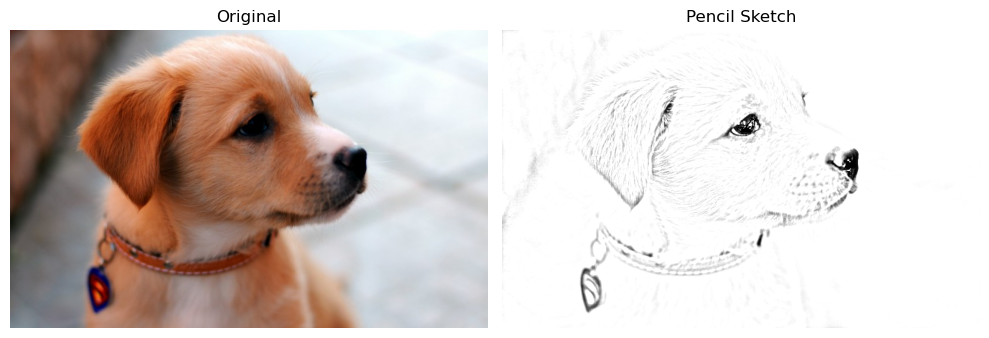

In [8]:
if __name__ == "__main__":
    
    input_path = "datasets/dog.jpg"
    sketch = pencil_sketch(input_path, blur_kernel=(25,25))

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    img = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(sketch, cmap="gray")
    plt.title("Pencil Sketch")
    plt.axis("off")
    plt.tight_layout()
    plt.show()